<a href="https://colab.research.google.com/github/Devathajb/super-barnacle/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["I love machine learning", "Machine learning is fun", "I love fun challenges"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

print(vectorizer.get_feature_names_out())  # Show all unique words
print(X.toarray())  # TF-IDF scores in matrix form

['challenges' 'fun' 'is' 'learning' 'love' 'machine']
[[0.         0.         0.         0.57735027 0.57735027 0.57735027]
 [0.         0.45985353 0.60465213 0.45985353 0.         0.45985353]
 [0.68091856 0.51785612 0.         0.         0.51785612 0.        ]]


In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
rev="I am an Indian."
print(clean_review(rev))

I Indian.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv" with length 9,370,330 bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv to Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv
User uploaded file "Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv" with length 9,370,330 bytes


In [14]:
data = pd.read_csv('Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [16]:
data.dropna(inplace=True)

In [17]:
data.loc[data['Sentiment']<=3,'Sentiment'] = 0
data.loc[data['Sentiment']>3,'Sentiment'] = 1

In [18]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview

In [19]:
data['Review']=data['Review'].apply(clean_review)

In [20]:
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [21]:
data['Sentiment'].value_counts()

,count
Sentiment,
0,15000
1,9999


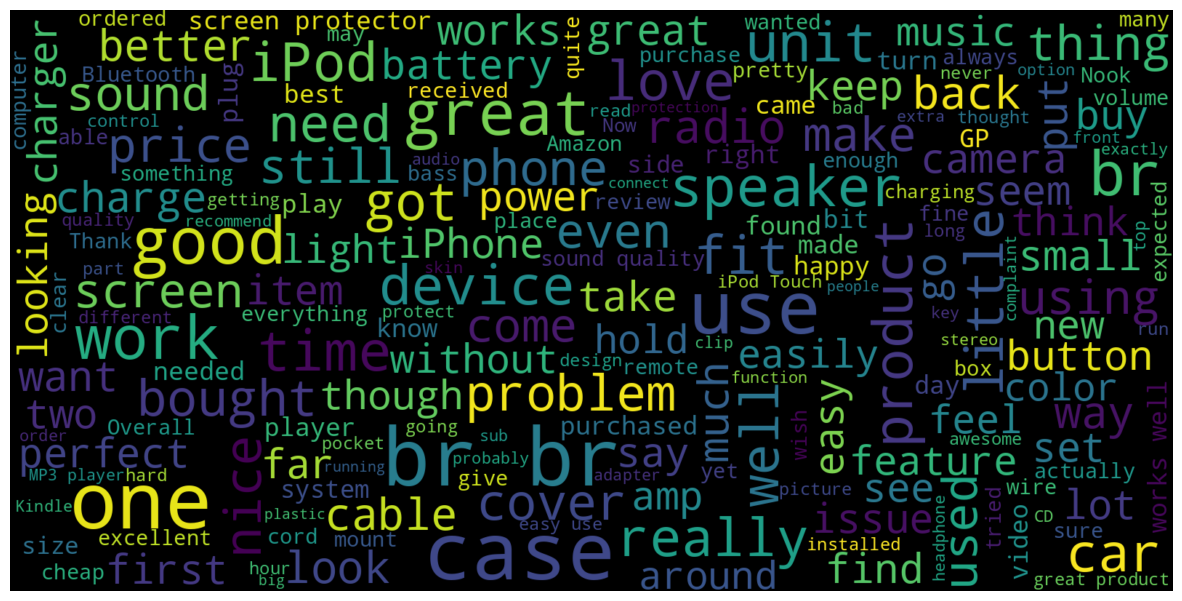

In [22]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
cv = TfidfVectorizer(max_features=2500)
x = cv.fit_transform(data['Review']).toarray()

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,data['Sentiment'],test_size=0.25,random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

0.81552


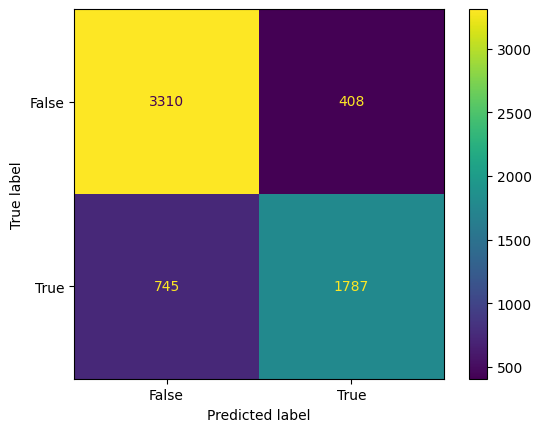

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()